# K-Fold Cross-Validation

A disadvantage of partitioning a dataset into training and testing sets is the variance in the estimates of parameters. Everytime the testing set is altered, parameter estimates could change.

[K-fold cross-validation](https://en.wikipedia.org/wiki/Cross-validation_\(statistics\)) is designed to address this issue. In this scheme, the dataset is split into training and testing sets k-times with the condition that an observation is in the testing set only once and in the training set k - 1 times.

The k number of scores produced by feeding the training and testing sets into the estimator k-times are averaged, giving a more robust indication of the out-of-sample performance of the trained model.

This process is demonstrated below using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) and the *cross_val_function* from [scikit-learn](http://scikit-learn.org/stable/) package.

In [28]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

iris = load_iris()
X = iris.data
y =  iris.target
knn_model = KNeighborsClassifier(n_neighbors=5)

# do 10-fold cross-validation. Ten is the accepted norm.
kFoldScores = cross_val_score(knn_model, X, y, cv=15, scoring='accuracy')

print("The mean of the k-fold scores is {:.4f}".format(kFoldScores.mean()))


The mean of the k-fold scores is 0.9648


The optimal value of the *n_neighbors* hyper-parameter to the knn model was found to be 5 in the previous notebook. Can this be improved using k-fold cross-validation?

In [29]:
kFoldScores = []
for i in range(1, 51):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    currScore = cross_val_score(knn_model, X, y, cv=15, scoring='accuracy')
    kFoldScores.append(currScore.mean())

print(kFoldScores)

[0.95925925925925926, 0.95185185185185195, 0.96666666666666667, 0.96666666666666667, 0.96481481481481479, 0.96481481481481479, 0.96481481481481479, 0.95740740740740737, 0.9648148148148149, 0.9648148148148149, 0.9648148148148149, 0.97222222222222221, 0.97962962962962963, 0.9648148148148149, 0.97962962962962963, 0.97222222222222221, 0.97222222222222221, 0.97222222222222221, 0.97962962962962963, 0.97962962962962963, 0.97962962962962963, 0.97222222222222221, 0.95925925925925926, 0.9648148148148149, 0.95925925925925926, 0.9648148148148149, 0.95925925925925926, 0.9462962962962963, 0.95370370370370372, 0.95370370370370372, 0.95370370370370372, 0.95185185185185195, 0.9462962962962963, 0.94444444444444453, 0.9462962962962963, 0.95185185185185195, 0.9462962962962963, 0.9462962962962963, 0.9462962962962963, 0.9462962962962963, 0.95370370370370372, 0.9462962962962963, 0.95370370370370372, 0.9462962962962963, 0.9462962962962963, 0.94074074074074077, 0.93518518518518523, 0.94259259259259265, 0.94259

As always, a plot is more enlightening than mere numbers.

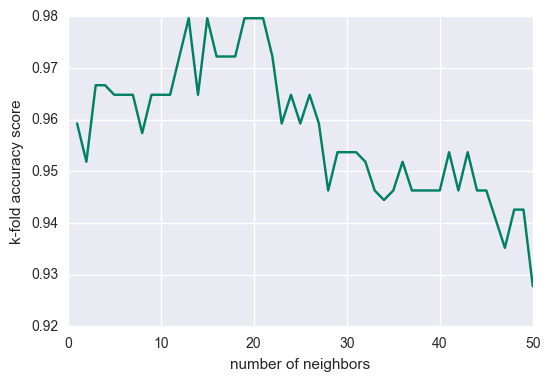

In [30]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

plt.plot(range(1, 51), kFoldScores, c = cm.summer(0))
plt.xlabel("number of neighbors")
plt.ylabel("k-fold accuracy score")

The optimal number of neighbors to pass as a hyper-parameter to the knn estimator has changed. One of them is 20.